In [1]:
from langgraph.graph import StateGraph , START , END 
#from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from typing import TypedDict 
from dotenv import load_dotenv


In [2]:
load_dotenv()

model = ChatGroq(model="llama-3.1-8b-instant")

In [3]:
# Define State 

class pcState(TypedDict):

    topic:  str #user input
    outline: str
    blog : str
    score : int

In [4]:
def outline(state:pcState )->pcState:

    topic = state['topic']

    # Define Prompt
    prompt =f'Create outline for the above topic : {topic}'

    # Define outline
    outline = model.invoke(prompt)

    # Return the value of outline
    state['outline'] = outline

    return state

In [5]:
def blog(state:pcState)->pcState:

    topic = state['topic']
    outline = state['outline']

    # Define prompt
    prompt = f'Create the detailed blog for this topic : {topic} /n with the help of above outline:/n/n  {outline}'

    # Define Blog
    blog = model.invoke(prompt)

    # Save value of Blog in State
    state['blog'] = blog

    return state

In [19]:
def evaluate(state: pcState)->pcState:

    outline = state['outline']
    blog = state['blog']

    # Define prompt
    prompt = f'Evaluate my blog /n/n {blog} /n/n based on this above outline : {outline} /n/n and generate the score which can only integer type , you cannot generate any other type of output for "score" , you can only output it "out of 100", you cannot give anytype of textual output in "score" '    

    # Define the score 
    score = model.invoke(prompt)

    # Store value of score in state
    state['score'] = score

    return state

In [ ]:
# Define Graph
graph = StateGraph(pcState)

# Define Nodes
graph.add_node('outline', outline)
graph.add_node('blog',blog)
graph.add_node('evaluate',evaluate)

# Define Edges
graph.add_edge(START,'outline')
graph.add_edge('outline','blog')
graph.add_edge('blog','evaluate')
graph.add_edge('evaluate',END)

# Compile graph
workflow = graph.compile()



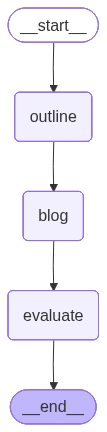

In [21]:
workflow

In [26]:
#Execute the graph

initial_state={'topic':'Tourism in INDIA '}

final_state = workflow.invoke(initial_state)

print(final_state)

{'topic': 'Tourism in INDIA ', 'outline': AIMessage(content="**I. Introduction**\n\n- Overview of India as a popular tourist destination\n- Importance of tourism in India's economy\n- Brief history of tourism development in India\n\n**II. Types of Tourism in India**\n\n1. **Adventure Tourism**\n   - Activities: trekking, mountaineering, white water rafting, skiing\n   - Popular destinations: Himalayas, Ladakh, Rann of Kutch\n\n2. **Cultural Tourism**\n   - Experiencing Indian culture, art, and architecture\n   - Popular destinations: Delhi, Agra, Jaipur, Varanasi, Hampi\n\n3. **Wildlife Tourism**\n   - Exploring India's rich wildlife and national parks\n   - Popular destinations: Jim Corbett National Park, Kanha National Park, Bandhavgarh National Park\n\n4. **Beach Tourism**\n   - Relaxing on India's beautiful beaches\n   - Popular destinations: Goa, Kerala, Pondicherry, Tamil Nadu\n\n5. **Spiritual Tourism**\n   - Visiting India's sacred sites and pilgrimage centers\n   - Popular des

In [24]:
print(final_state['score'].content)

**Score: 92 / 100**
